In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Processing and Analysis

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US_Accidents_March23.csv")

In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [8]:
missing_percentage=df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentage

,0
End_Lng,4.402935e-01
End_Lat,4.402935e-01
Precipitation(in),2.851286e-01
Wind_Chill(F),2.586590e-01
Wind_Speed(mph),7.391355e-02
Visibility(mi),2.291524e-02
Wind_Direction,2.267043e-02
Humidity(%),2.253301e-02
Weather_Condition,2.244438e-02
Temperature(F),2.120143e-02


Plotting the values that are greater then zero in %

<Axes: >

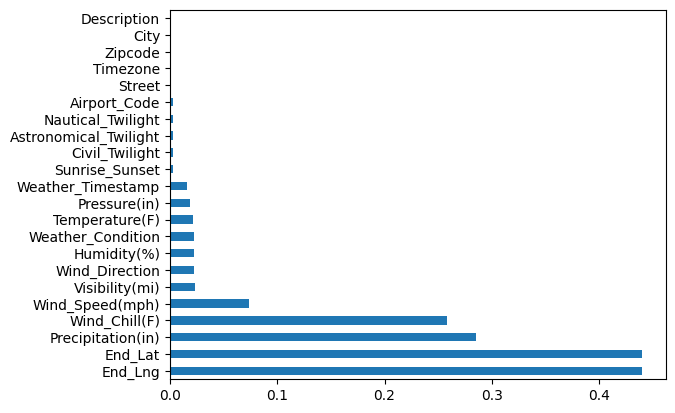

In [9]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

Remove the columns that you won't need

In [10]:
drop_values =df.replace(to_replace='None', value=np.nan).dropna()
drop_values

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3402762,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,False,False,Night,Night,Night,Night
3402767,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,False,False,False,False,False,False,Day,Day,Day,Day
3402771,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,...,False,False,False,False,False,False,Day,Day,Day,Day
3402773,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,...,False,False,False,False,False,False,Day,Day,Day,Day
3402774,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


##Exploratory Analysis and Visulization

columns we will analyze
1. City
2.Start time
3.start Lat,start lng
4.temperature
5.Weather condition


In [11]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [12]:
df.City

,City
0,Dayton
1,Reynoldsburg
2,Williamsburg
3,Dayton
4,Dayton
...,...
7728389,Riverside
7728390,San Diego
7728391,Orange
7728392,Culver City


In [13]:
cities = df.City.unique()
len(cities)

13679

In [14]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
...,...
Rapid River,1
Cat Spring,1
Glenwood City,1


In [15]:
cities_by_accidents[:20]

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
Orlando,109733
Austin,97359
Raleigh,86079
Nashville,72930


<Axes: ylabel='City'>

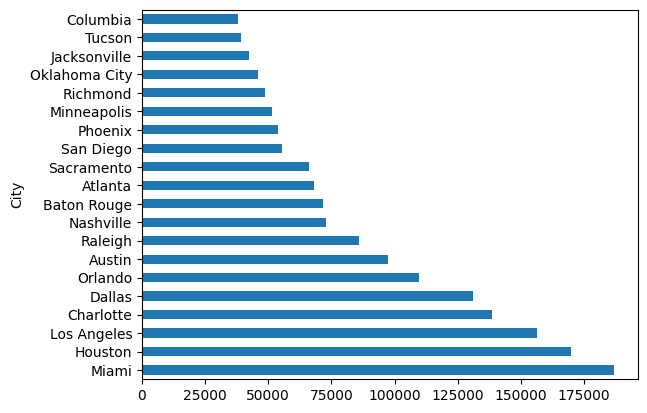

In [16]:
cities_by_accidents[:20].plot(kind='barh')

In [17]:
sns.set_style('darkgrid')

<Axes: xlabel='count', ylabel='Count'>

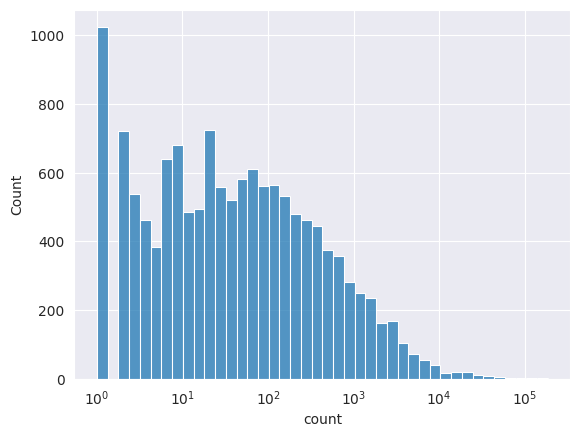

In [18]:
sns.histplot(cities_by_accidents,log_scale=True)

In [19]:
high_accident_cities = cities_by_accidents[cities_by_accidents > 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [20]:
len(high_accident_cities) / len(cities)

0.08882228233057972

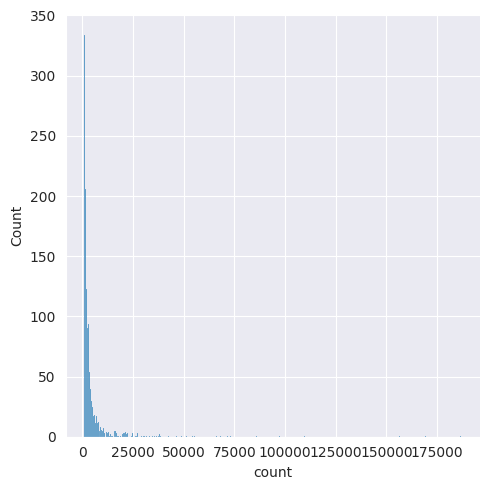

In [21]:
sns.displot(high_accident_cities)

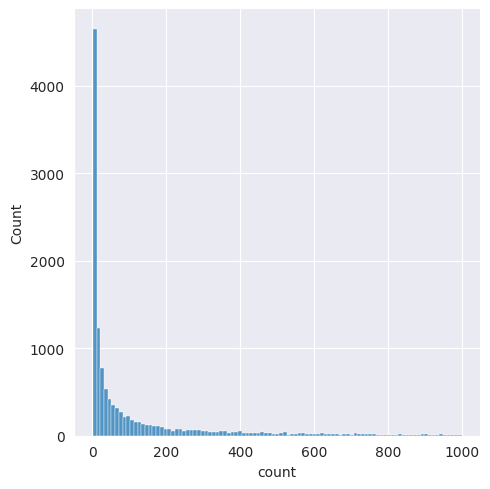

In [22]:
sns.displot(low_accident_cities)

In [23]:
cities_by_accidents[cities_by_accidents == 1]

,count
City,
American Fork-Pleasant Grove,1
Waldoboro,1
Kinsley,1
Killona,1
Jeanerette,1
...,...
Rapid River,1
Cat Spring,1
Glenwood City,1


### Start Time

In [24]:
df.Start_Time

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
7728389,2019-08-23 18:03:25
7728390,2019-08-23 19:11:30
7728391,2019-08-23 19:00:21
7728392,2019-08-23 19:00:21


In [25]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time, format='mixed')


In [27]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

<ipython-input-28-dc3c6f7e7f31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

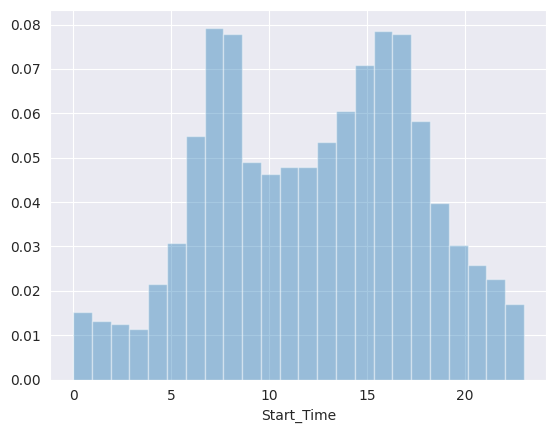

In [28]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

-A high percentage of accidents are occur between 7am to 10am

-Next highest number of accidents are  occuring between 3pm to 6pm

<ipython-input-29-9a42be3cf92c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

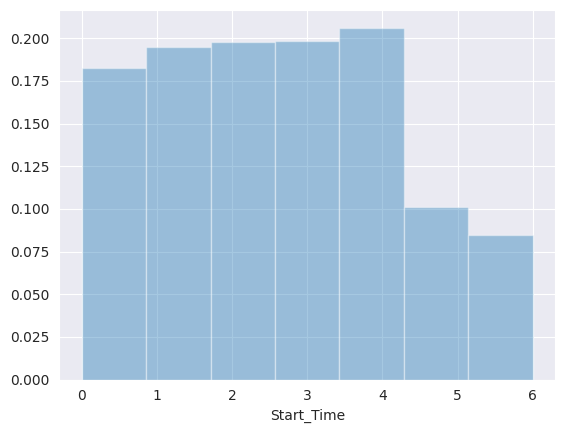

In [29]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

Is the distribution of accidents by hour are same as the weeekends as on weekdays

<ipython-input-30-5dbaeafce422>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sunday_Start_time.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

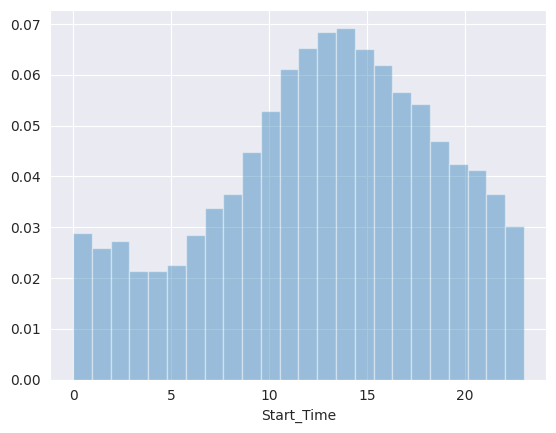

In [30]:
Sunday_Start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(Sunday_Start_time.dt.hour,bins=24,kde=False,norm_hist=True)

<ipython-input-31-4f454811a790>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_Start_time.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

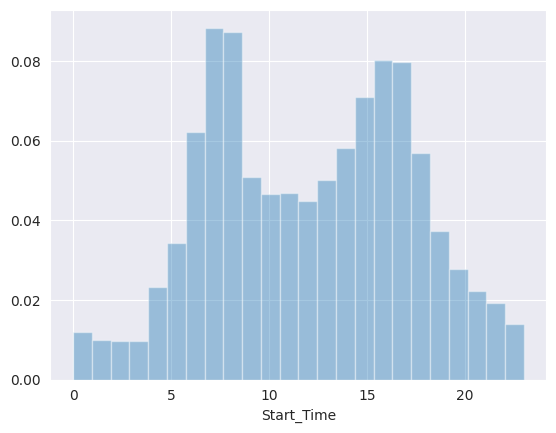

In [31]:
monday_Start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_Start_time.dt.hour,bins=24,kde=False,norm_hist=True)

<ipython-input-32-61b5a0cbc520>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

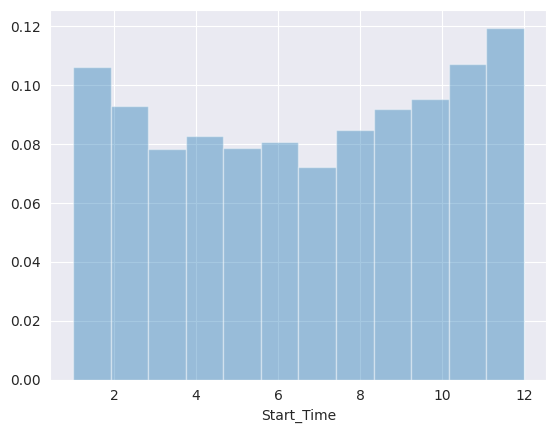

In [32]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

<ipython-input-33-2f818e8f732c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

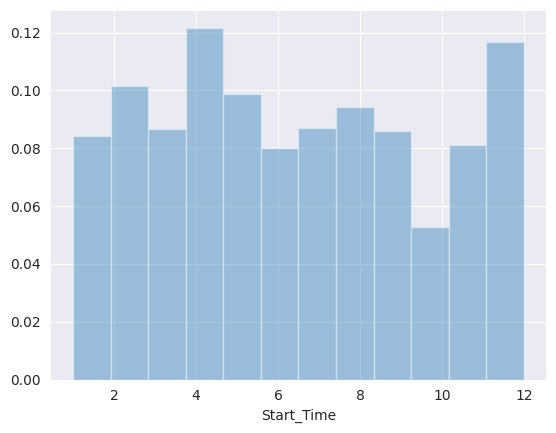

In [33]:
df_2019 = df[df.Start_Time.dt.year == 2022]
df_2019_Bing = df_2019[df_2019.Source == 'Bing']
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

Can you explain the month-wise trend of accidents?

-Much data is missing for 2017 or may be 2023.

-There seems to be issue with bing data

<Axes: ylabel='count'>

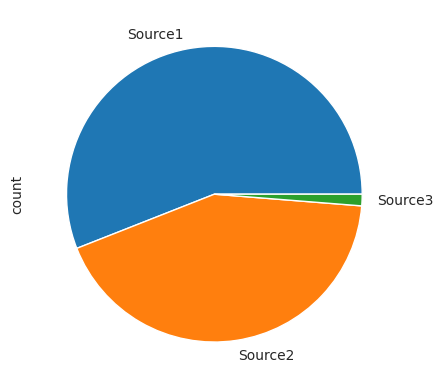

In [34]:
df.Source.value_counts().plot(kind='pie')

Consider excluding Bing data, Seems to have issue

## Start Latitude and Start Longitude

In [35]:
df.Start_Lat

,Start_Lat
0,39.865147
1,39.928059
2,39.063148
3,39.747753
4,39.627781
...,...
7728389,34.002480
7728390,32.766960
7728391,33.775450
7728392,33.992460


In [36]:
df.Start_Lng

,Start_Lng
0,-84.058723
1,-82.831184
2,-84.032608
3,-84.205582
4,-84.188354
...,...
7728389,-117.379360
7728390,-117.148060
7728391,-117.847790
7728392,-118.403020


In [37]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

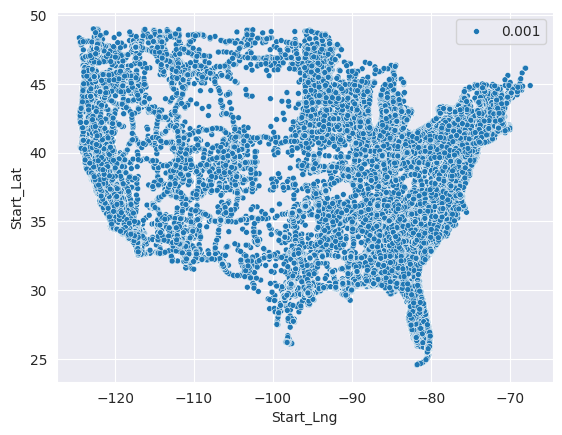

In [38]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

In [40]:
!pip install folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 2.9 MB/s eta 0:00:00


In [41]:
import folium

In [42]:
lng,lat = df.Start_Lng[0],df.Start_Lat[0]
lng,lat

(-84.058723, 39.865147)

In [46]:
# Sample 100 rows from the DataFrame
sampled_df = df[['Start_Lat', 'Start_Lng']].sample(100)

# Iterate through the rows and print the values
for index, row in sampled_df.iterrows():
    print(row['Start_Lat'], row['Start_Lng'])


36.903835 -76.25241899999997
39.396332 -119.758186
35.082355 -85.20657299999998
39.934208 -82.852051
36.143002 -86.753052
39.72151 -83.020393
33.037351 -80.20303299999998
34.074665 -81.678322
37.30350900000001 -76.683685
33.902473 -84.706505
33.968449 -117.849117
47.60729600000001 -122.337105
43.217823 -70.893814
38.66959 -77.25753
43.450981 -83.975571
42.233299 -88.880829
27.449938 -82.530499
33.97392 -118.080184
26.51598 -81.94391
33.080813 -117.120172
28.483699 -81.261298
35.257711 -92.387167
41.233963 -96.159561
34.029804 -84.048378
34.938175 -82.060509
25.581198 -80.514865
40.679108 -74.278366
33.756189 -78.866265
39.412811 -76.46386700000002
38.196254968461055 -78.9955508705187
41.425926 -81.761238
33.65425 -111.88724
34.33730300000001 -118.507645
35.67568659765398 -86.28472208935602
34.302181 -117.460616
44.024373 -123.818407
40.243861 -76.885526
30.117096000000004 -97.695195
34.246994 -117.300552
36.966973 -121.76497
39.068485 -84.520126
28.512988 -81.375291
45.132648 -93.23506

In [ ]:
list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [48]:
from folium.plugins import HeatMap

In [52]:
sample_df = df.sample(int(0.1 * len(df)))
lat_longs = zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng))

In [53]:
map = folium.Map()

HeatMap(lat_longs).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

## Ask and Answer question

1. Are there more accidents in warmer or in colder areas?
2. Which states has the highest number of accidents? How about per capita?
3. Does New york show up in the data? If yes,the count of accidents is lower then the populated city?
4. Amoung the top 100 cities in number of accidents, Which state they belong frequently?
5. What time of the day have the most frequent accidents? ANSWERED
6. what day of the week has the most frequent accidents?
7. Which month have the most accident
8. What is the trend of accidents over year over(decreasing/Incresing)
9. When is the accidents per unit of trafic the highest.


## Summmary and Conclusion

Insight

-No Data for New York
-The number of accidents per city decreses exponenetially
- Less than 5% cities have more than 1000 yearly accidents
-Over 1200 cities have reported just one accidents(need to investigate)